
Lab 1: Gapminder Data Visualization

*Working with Data of Global Indicators – Gapminder*





# TASK 1


---



In [63]:
#necessary installs
#!pip install plotnine
#!pip install patchworklib

In [64]:
#Uploading Data
import pandas as pd

pd.read_csv("q1data.csv")

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [65]:
# Assinging my_data to be the file I read in
my_data1 = "q1data.csv"

# Creating a data fram as df from my_data
df = pd.read_csv(my_data1)

# First five rows
df.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa




1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics used in this plot are income for the x axis, life expectancy for the y axis, four regions for the color, and population for the size



2.   Plot Recreation


C:\Users\dhfer\AppData\Local\Temp\ipykernel_26072\1710427087.py:30: RuntimeWarning: divide by zero encountered in log10
C:\Users\dhfer\anaconda3\Lib\site-packages\mizani\breaks.py:339: RuntimeWarning: invalid value encountered in add
C:\Users\dhfer\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


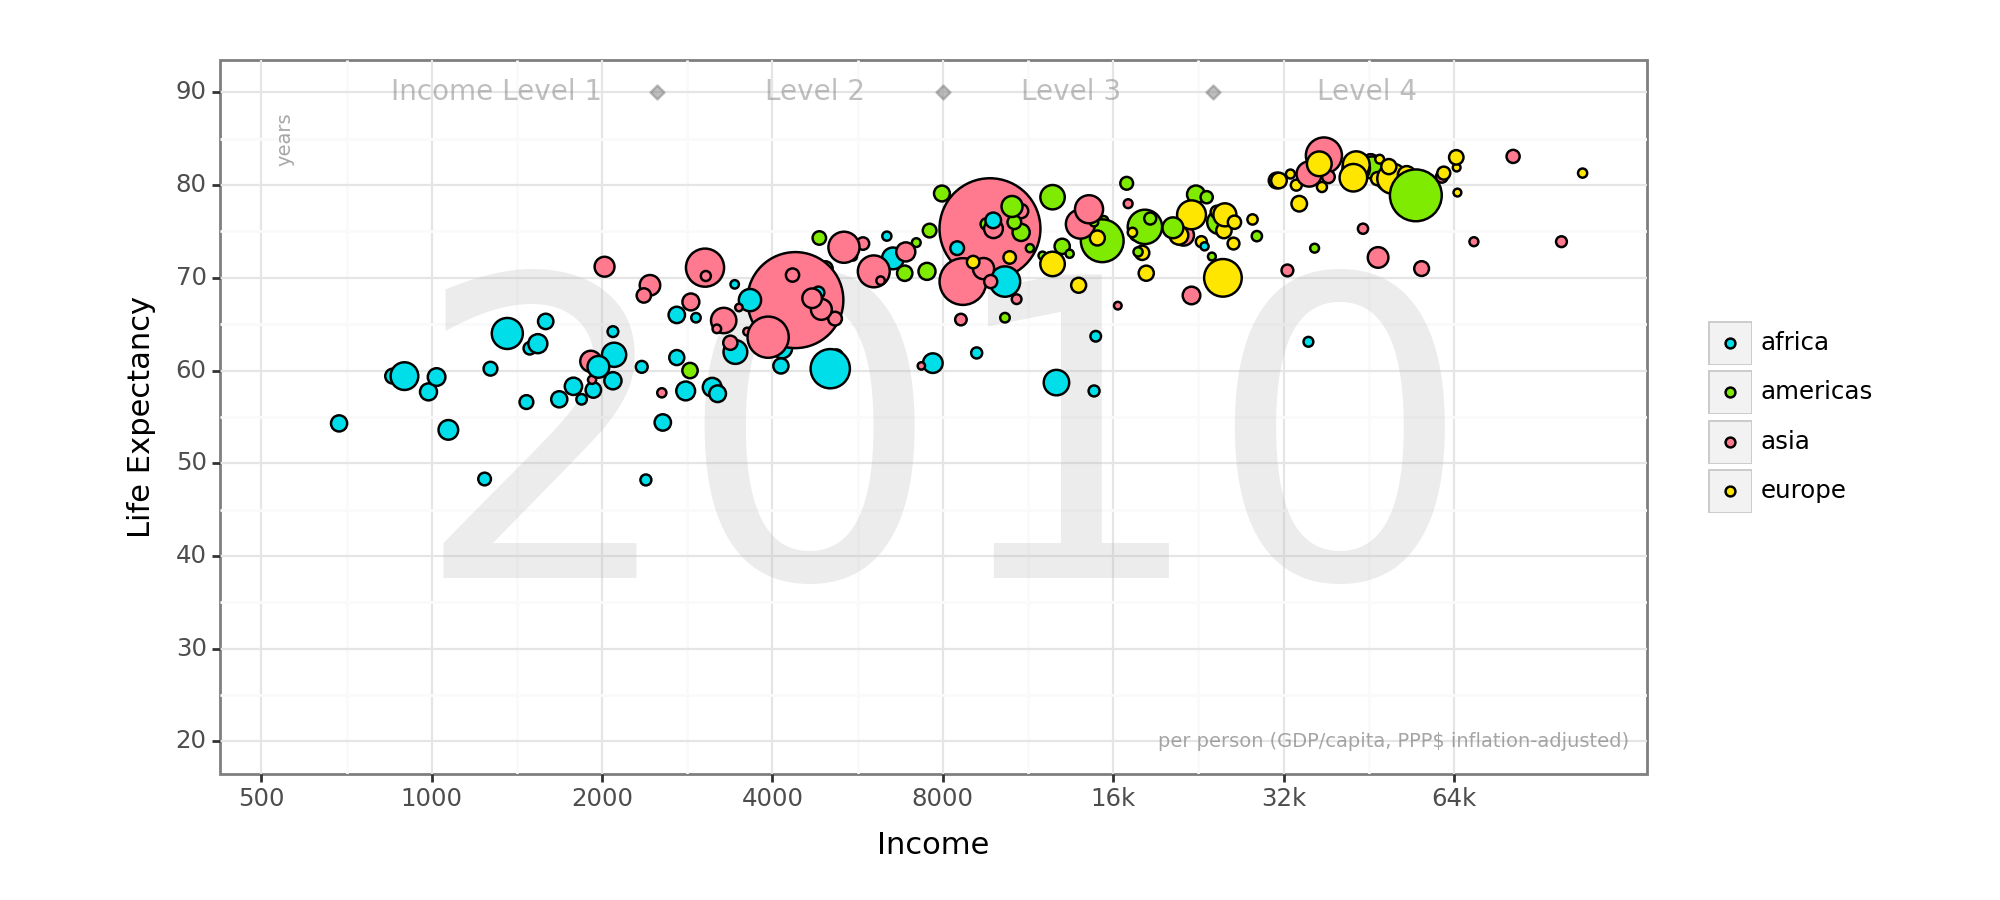

<Figure Size: (1000 x 450)>

In [66]:
#Getting the necessary library for this project
import pandas as pd
from plotnine.labels import ylab
from plotnine import ggplot, aes, geom_point, scale_color_gradient, scale_x_continuous, scale_y_continuous, theme, scale_color_manual, geom_text, scale_size, facet_wrap, xlab, ylab, scale_x_log10, element_blank, guides, guide_legend, theme_bw, annotate, scale_fill_manual

import numpy as np
#Ommiting blanks for the four_regions column
df = df[pd.notna(df['four_regions'])]

#transforming the x variable to see the linear relationship better
df['log_income'] = np.log10(df['income'])


#Plotting, First ggplot, then aesthetics, annotations, geom_point, scaling: custom labels, themes, coloring, custom legends
p1 = (ggplot(aes(x='log_income', y='life_exp' , fill='four_regions', size = 'population'), df)
                      + annotate("text", x = np.log10(8000), y = 50, label = df['year'], color = "silver", size = 150, alpha = 0.3)
                      + annotate("text", x = np.log10(1300), y = 90, label = 'Income Level 1', color = "gray", size = 10, alpha = 0.5)
                      + annotate("text", x = np.log10(4750), y = 90, label = 'Level 2', color = "gray", size = 10, alpha = 0.5)
                      + annotate("text", x = np.log10(13500), y = 90, label = 'Level 3', color = "gray", size = 10, alpha = 0.5)
                      + annotate("text", x = np.log10(45000), y = 90, label = 'Level 4', color = "gray", size = 10, alpha = 0.5)
                      + annotate(geom = "point", x = np.log10(2500), y = 90, shape = "D", color = "gray", size = 1.5, alpha = 0.5)
                      + annotate(geom = "point", x = np.log10(8000), y = 90, shape = "D", color = "gray", size = 1.5, alpha = 0.5)
                      + annotate(geom = "point", x = np.log10(24000), y = 90, shape = "D", color = "gray", size = 1.5, alpha = 0.5)
                      + annotate("text", x = np.log10(550), y = 85, label = "years", color = "gray", size = 7, alpha = 0.7, angle = 90)
                      + annotate("text", x = np.log10(50000), y = 20, label = "per person (GDP/capita, PPP$ inflation-adjusted)", color = "gray", size = 7, alpha = 0.7)
                      + geom_point(alpha = 1)
                      + xlab("Income") + ylab("Life Expectancy")
                      + scale_fill_manual(values={'europe':'#FFE600','asia':'#FF798F','americas':'#7FEB00','africa':'#00DFE9'})
                      + scale_size(range=[1, 20])
                      + scale_x_continuous(breaks=np.log10([0, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]),
                                           labels=[0, 500, 1000, 2000, 4000, 8000, "16k", "32k", "64k"])
                      + scale_y_continuous(limits=(20, 90), breaks=range(20, 100, 10))
                      + theme_bw()
                      + theme(aspect_ratio=.5, figure_size=(10, 4.5))
                      + theme(legend_title=element_blank()) + guides(size=False))
p1



4.   What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Here, I visualized the aesthetics that were being showcased in the first plot. However, the first plot does a much better job at representing the data in one plot and it also looks cleaner.

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


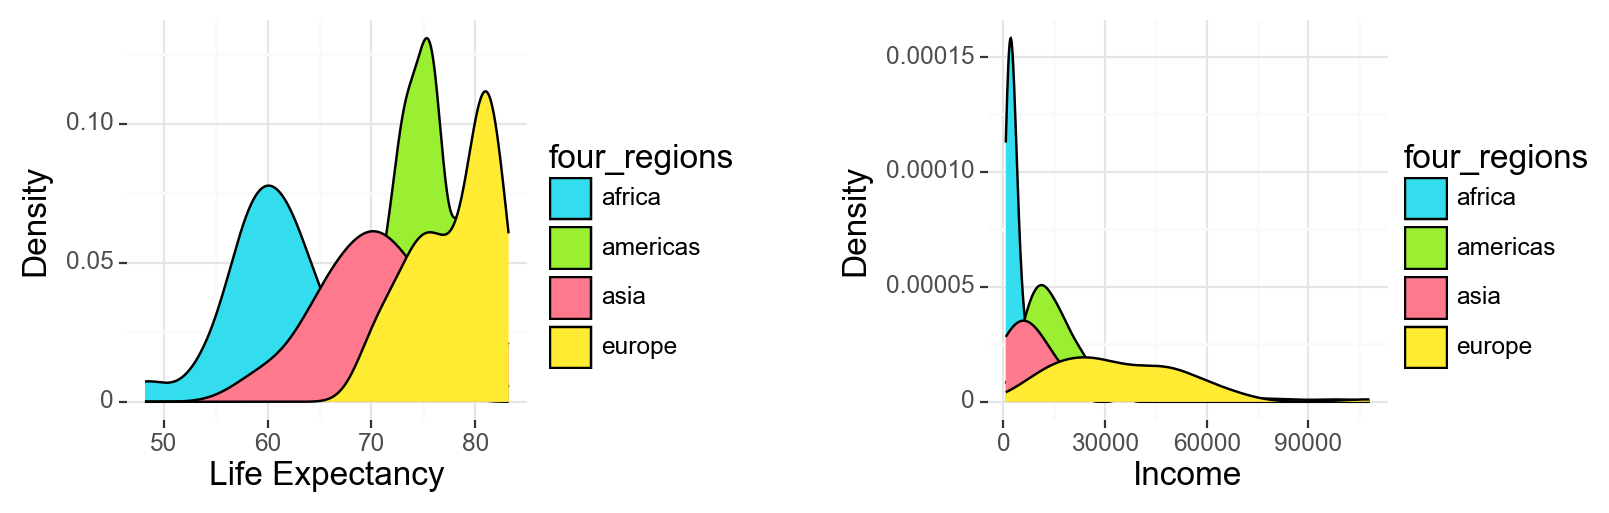

In [67]:
#necessary libraries etc.
import matplotlib
import patchworklib as pw
from plotnine import *
from plotnine.data import *


# plot for life expectancy
g1 = (ggplot(df, aes(x='life_exp', fill='four_regions'))
      + geom_density(alpha=1)
      + xlab("Life Expectancy")
      + ylab("Density")
      + scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})
      + theme_bw())

# plot for income
g2 = (ggplot(df, aes(x='income', fill='four_regions'))
      + geom_density(alpha=1)
      + xlab("Income")
      + ylab("Density")
      + scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})
      + theme_bw())


# Combine plots
g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))

g12 = (g1|g2)

#visual
g12

# TASK 2


---



Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.




1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics used in this plot are exports as a percent of gdp for the x axis, imports as a percent of gdp for the y axis, four regions for the color, and energy use for the size

In [68]:
#importing data
pd.read_csv("q2dataoriginal.csv")

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [69]:
# Assinging my_data to be the file I read in
my_data2 = "q2dataoriginal.csv"

# Creating a data fram as df from my_data
q2 = pd.read_csv(my_data2)

#first five rows
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [70]:
#Cleaning
type('energy')
#trying to change energy to float in order to be able to use it
#Making everything in energy a string
q2['energy'] = q2['energy'].astype(str)

#WHILE LOOP, instantiate a variable called i, starting at 0, can have any value, going in the energy series the i will go till the last value
i = 0

while i < len(q2['energy']):
    if 'k' in q2['energy'][i]: #i is going to the
        q2['energy'][i] = q2['energy'][i].replace('k', '')
        q2.loc[i, 'energy'] = np.float64(q2.loc[i, 'energy']) #the .loc mostly used to replace something from a certain index to something in another index, here used to pinpoint the ith index of energy
        q2['energy'][i] = q2['energy'][i]*1000
        i = i + 1
    else:
        q2.loc[i, 'energy'] = np.float64(q2.loc[i, 'energy'])
        i = i + 1
q2['energy'] = q2['energy'].astype(float)

In [71]:
#some data cleaning
q2.dropna(inplace=True)



2.   Plot Recreation


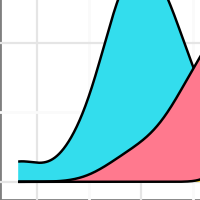

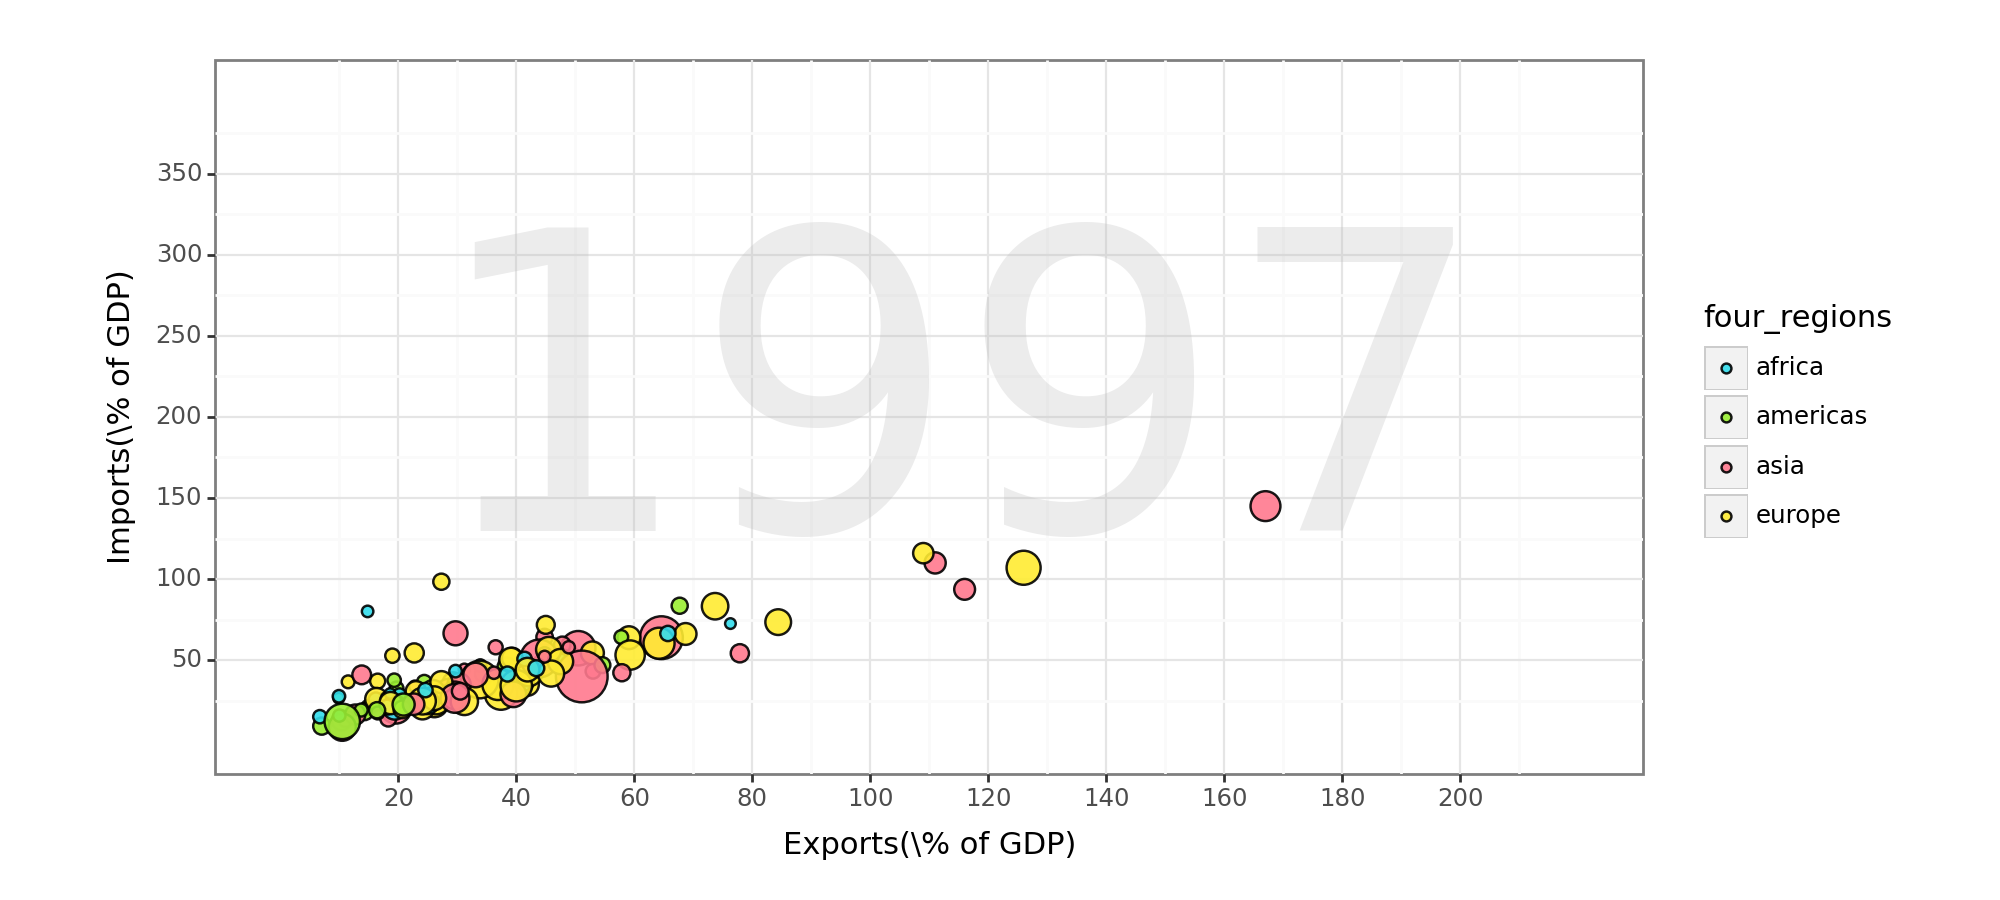

<Figure Size: (1000 x 450)>

In [72]:
#creating plot for task 2
p2 = ggplot(aes(x='exports', y='imports' , fill='four_regions', size = 'energy'), q2)\
+ geom_point(alpha = .9)\
+ annotate("text", x = 115, y = 200, label = 1997, color = "silver", size = 150, alpha = 0.3)\
+ scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})\
+ scale_size(range=[1, 10]) \
+ xlab("Exports(\% of GDP)")\
+ scale_x_continuous(limits=(0, 220), breaks=range(20, 220, 20))\
+ ylab("Imports(\% of GDP)")\
+ scale_y_continuous(limits=(0, 400), breaks=range(50, 400, 50))\
+ theme(legend_title=element_blank()) + guides(size=False)\
+ theme_bw()\
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))\

#visual
p2





4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Here, I visualize the same data using boxplots, for this one I think this is a better represenations of the data by region, however, it isn't really showing a relationship between the export and imports. 

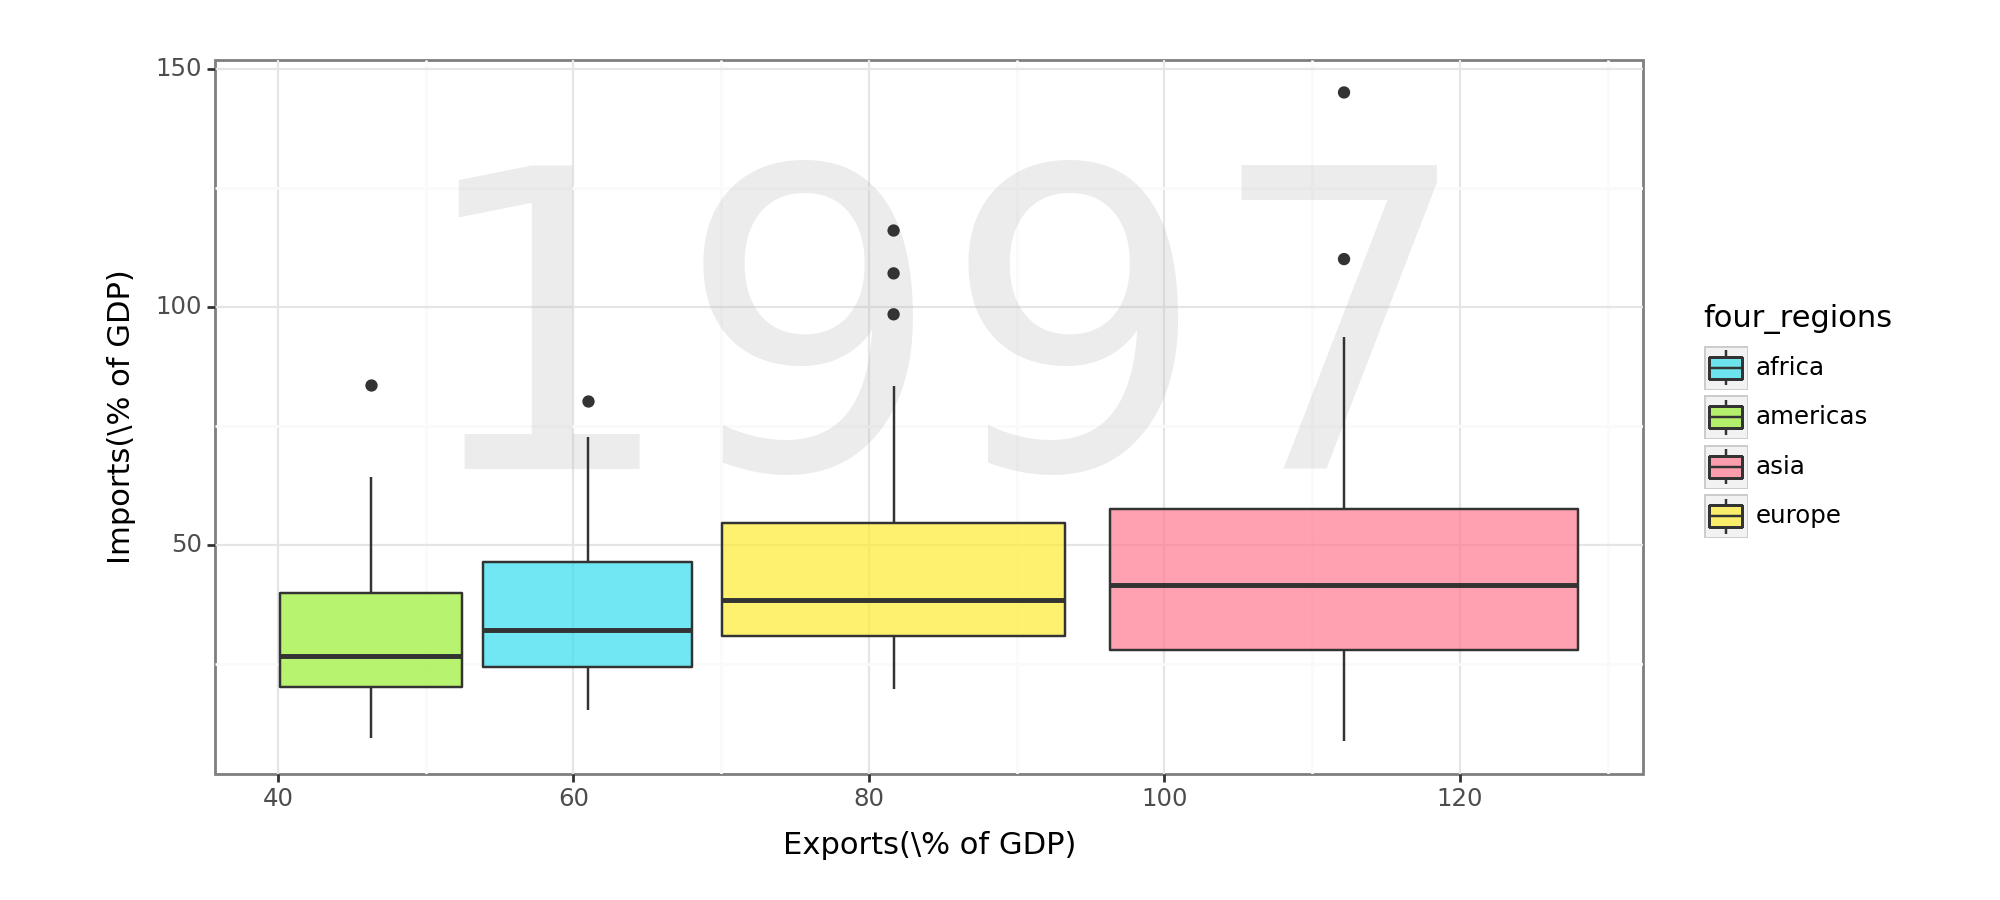

<Figure Size: (1000 x 450)>

In [73]:
#other geometry for plot for task 2
p2b = ggplot(aes(x='exports', y='imports' , fill='four_regions', size = 'energy'), q2  )\
+ annotate("text", x = 85, y = 90, label = 1997, color = "silver", size = 150, alpha = 0.3)\
+ geom_boxplot(alpha = .7)\
+ scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})\
+ xlab("Exports(\% of GDP)")\
+ ylab("Imports(\% of GDP)")\
+ theme(legend_title=element_blank()) + guides(size=False)\
+ theme_bw()\
+ theme(aspect_ratio=.5, figure_size=(10, 4.5))

#visual
p2b

# TASK 3




1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics used in this plot are individuals using the internet for the x axis, gdp for the y axis, four regions for the color, and income use for the size

In [74]:
#importing data
pd.read_csv('q3data.csv')

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [75]:
# Assinging my_data to be the file I read in
my_data = "q3data.csv"

# Creating a data fram as df from my_data
df = pd.read_csv(my_data)

In [76]:
#Cleaning
import pandas as pd
df.dropna(inplace=True)
df.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
5,0.27000,2440.0,2900.0,2001,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


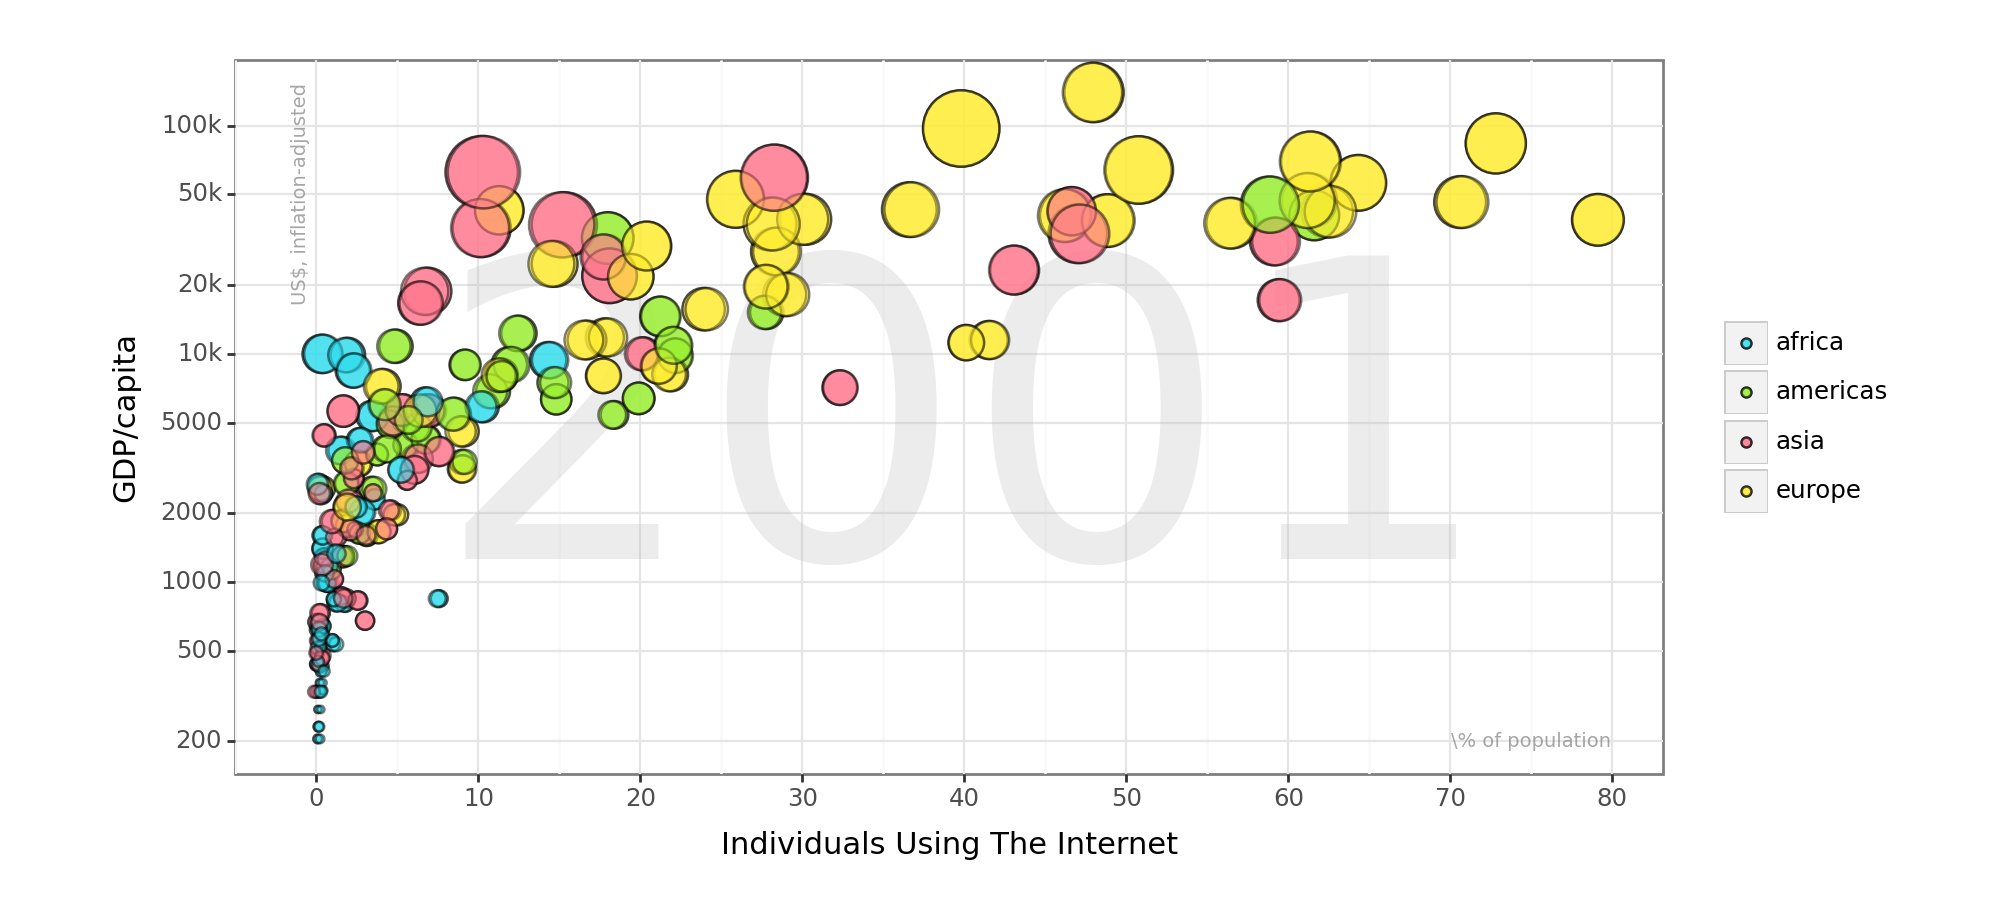

<Figure Size: (1000 x 450)>

In [77]:

import numpy as np
from plotnine import *
# Assuming you have already applied the logarithmic transformation:

p3 = ggplot(aes(x='internet_users', y='gdp' , fill='four_regions', size = 'income'), df) \
                      + annotate("text", x = 40, y = 4000, label = df['year'], color = "silver", size = 150, alpha = 0.3)\
                      + annotate("text", x = 75, y = 200, label = "\% of population", color = "gray", size = 7, alpha = 0.7)\
                      + annotate("text", x = -1, y = 50000, label = "US$, inflation-adjusted", color = "gray", size = 7, alpha = 0.7, angle = 90)\
                      + geom_point(alpha = .7) \
                      + geom_jitter(width=0.2, height=0, alpha=0.5) \
                      + scale_size(range=[1, 15]) \
                      + xlab("Individuals Using The Internet") + ylab("GDP/capita") \
                      + scale_x_continuous(breaks=([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), labels=([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))\
                      + scale_y_continuous(breaks=([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]),\
                                           labels=[200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k'], trans = 'log')\
                      + theme_bw()\
                      + theme(aspect_ratio=.5, figure_size=(10, 4.5))\
                      + scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})\
                      + theme(legend_title=element_blank()) + guides(size=False)
#visual
p3




4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Here, I visualize the same data using a line plot where each line is a region and it shows the relationship for gdp and internet users. Technically I am showing the same information, as well as income with the thickness of the line. However, this is not a great visualization, the geom_point was better. 

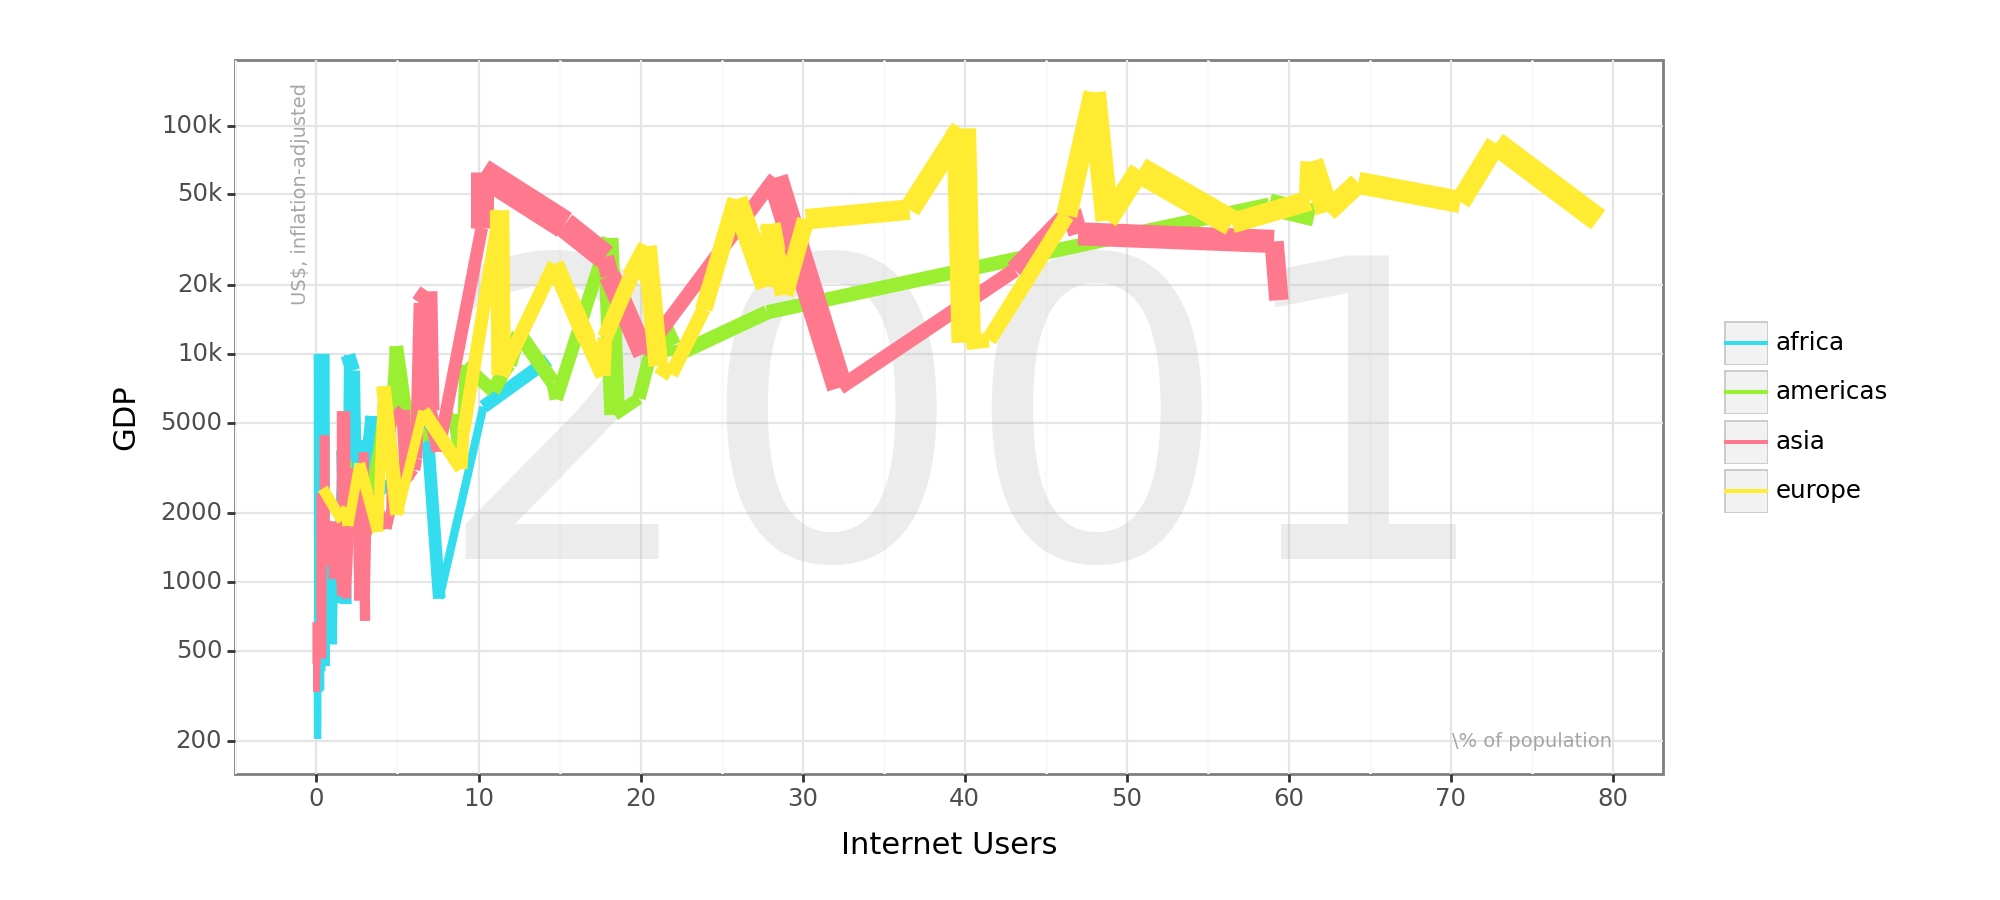

<Figure Size: (1000 x 450)>

In [78]:
#creating line plot with x, y and categories
p3b = ggplot(df, aes(x='internet_users', y='gdp', color='four_regions', size = 'income')) \
    + annotate("text", x = 40, y = 4000, label = df['year'], color = "silver", size = 150, alpha = 0.3)\
    + annotate("text", x = 75, y = 200, label = "\% of population", color = "gray", size = 7, alpha = 0.7)\
    + annotate("text", x = -1, y = 50000, label = "US$, inflation-adjusted", color = "gray", size = 7, alpha = 0.7, angle = 90)\
    + geom_line() \
    + scale_color_manual(values={'europe': '#FFEC32', 'asia': '#FF798E', 'americas': '#9AEF32', 'africa': '#33DDED'}) \
    + labs(x='Internet Users', y='GDP', color='Region') \
    + scale_x_continuous(breaks=([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), labels=([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))\
    + scale_y_continuous(breaks=([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]),\
                                labels=[200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k'], trans = 'log')\
    + theme_bw()\
    + theme(legend_title=element_blank()) + guides(size=False)\
    + theme(aspect_ratio=.5, figure_size=(10, 4.5))
#visual
p3b